## Ejercicio attrition

1. Carga el dataset [attrition de `kaggle`](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download) (Hay que loguearse en kaggle y descargar el csv)
   1. Clasificacion de si el empleado deja o no la empresa (el target es la columna Attrition).
   2. Usaremos TODAS las columnas disponibles del dataset. No hace falta volverse loco con el feature engineering, pero es posible que alguna cosa haya que hacer para poder meter todas las columnas. 
   
2. Prueba todos los métodos de clasificación vistos hasta ahora mediante GridSearchCV (logistic regression, SVM, al menos un metodo de boosting, random forest y MLP). Obligatorio usarlos todos por separado usando pipelines. Se puede hacer todo en sklearn.
   1. Hay que reportar la performance de los modelos con al menos: Accuracy, precission, recall, F1-Score y AUC-ROC
   2. IMPORTANTE: Comentar cual es el mejor metodo y cual es la mejor metrica para este caso de uso concreto.
   
3. Utiliza uno de los métodos para sacar la importancia de las variables del modelo escogido.
   **¿Qué es?**
   Serie de técnicas que asignan puntuaciones a las variables independientes de un modelo predictivo en función de su importancia relativa al realizar una predicción sobre la variable dependiente o target. 
   IMPORTANTE: Antes de obtener el feature importance siempre hay que evaluar la capacidad predictiva del modelo implementado.
   **Tipos**
   1. Métodos "built in" en modelos intrinsecamente intepretables (ya vistos al estudiar los modelos lineales y los modelos basados en árboles de decision). 
   2. Permutation importance
   3. Drop columns importance
   
4. Utilizar un ultimo metodo que sea un stacking (ensemble) de al menos 4 de los metodos anteriores. Obtener las metricas anteriores (acc, prec, recall, etc..)
   
5. Valoracion y comentarios de los resultados obtenidos al final. 

In [17]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
ds = pd.read_csv('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/4-Pipelines/ejercicios/WA_Fn-UseC_-HR-Employee-Attrition.csv', sep = ',')

In [40]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
X = ds.drop('Attrition', axis=1)
y = ds[['Attrition']]

In [30]:
X = X.select_dtypes(exclude=['object'])
from sklearn.preprocessing import LabelEncoder


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=10000)
}

# Definir los parámetros para GridSearchCV
params = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Support Vector Machine': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1]},
    'MLP Classifier': {'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)], 'classifier__alpha': [0.0001, 0.001]}
}

# Definir el pipeline
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Crear una función para evaluar y reportar los resultados
def evaluate_model(name, pipeline, params):
    grid = GridSearchCV(pipeline, param_grid=params, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]
    
    print(f"Results for {name}:")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
    print("\n")

# Evaluar todos los modelos
for name, model in models.items():
    pipeline = create_pipeline(model)
    evaluate_model(name, pipeline, params[name])


Results for Logistic Regression:
Best Parameters: {'classifier__C': 1}
Accuracy: 0.8844
Precision: 0.6923
Recall: 0.2308
F1-Score: 0.3462
AUC-ROC: 0.7548


Results for Support Vector Machine:
Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Accuracy: 0.8707
Precision: 0.6667
Recall: 0.0513
F1-Score: 0.0952
AUC-ROC: 0.7537


Results for Random Forest:
Best Parameters: {'classifier__n_estimators': 100}
Accuracy: 0.8776
Precision: 0.8000
Recall: 0.1026
F1-Score: 0.1818
AUC-ROC: 0.7085


Results for Gradient Boosting:
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}
Accuracy: 0.8605
Precision: 0.4000
Recall: 0.1026
F1-Score: 0.1633
AUC-ROC: 0.6943


Results for MLP Classifier:
Best Parameters: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}
Accuracy: 0.8129
Precision: 0.2647
Recall: 0.2308
F1-Score: 0.2466
AUC-ROC: 0.7148




In [34]:
# Definir el modelo y los parámetros para GridSearchCV
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

params_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Ajustar el modelo con GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid=params_rf, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

# Predicciones y métricas
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]

print("Random Forest Best Parameters:", grid_rf.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")

Random Forest Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Accuracy: 0.8707
Precision: 0.5714
Recall: 0.1026
F1-Score: 0.1739
AUC-ROC: 0.7097


In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns


# Definir el modelo y los parámetros para GridSearchCV
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

params_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Ajustar el modelo con GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid=params_rf, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

# Predicciones y métricas
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]

print("Random Forest Best Parameters:", grid_rf.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")


Random Forest Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Accuracy: 0.8707
Precision: 0.6000
Recall: 0.0769
F1-Score: 0.1364
AUC-ROC: 0.6884


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=60)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
    
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print("---------------------------")
print("Random Forest")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"F2 Score: {f2:.2f}")
print("---------------------------")

---------------------------
Random Forest
Accuracy: 0.88
Precision: 0.90
Recall: 0.87
F1 Score: 0.89
F2 Score: 0.88
---------------------------


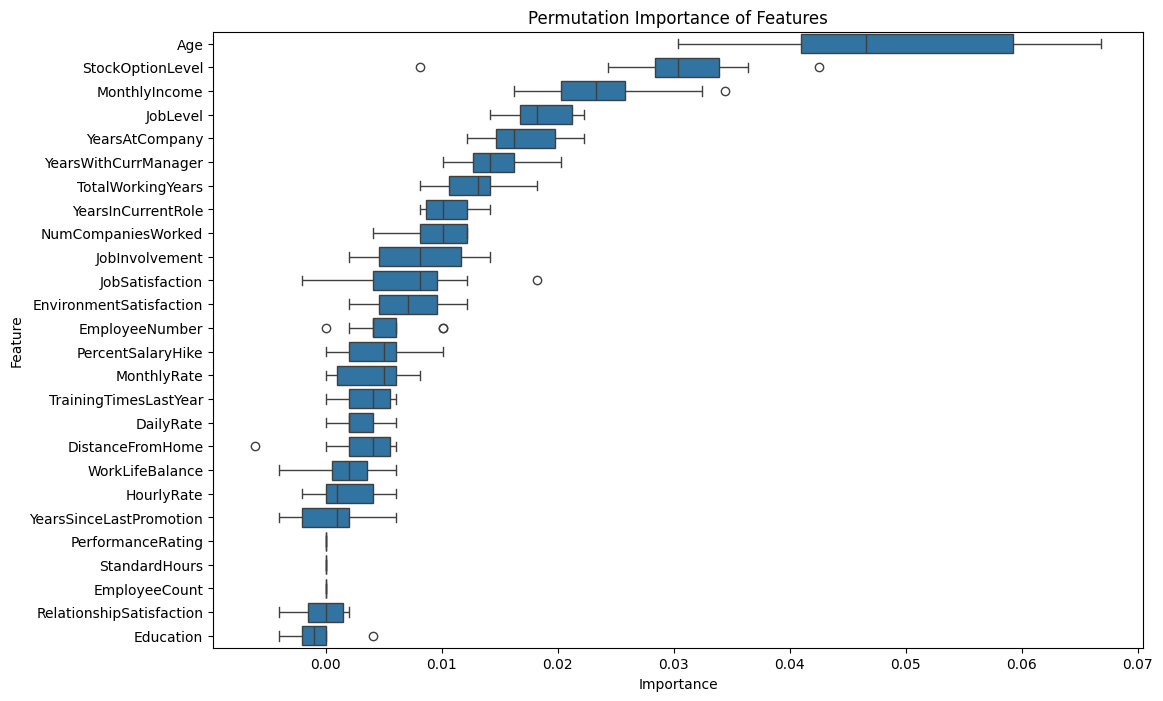

In [44]:
# Calcular la importancia de las variables usando Permutation Importance
result = permutation_importance(grid_rf.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Crear un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({
    'Feature': np.repeat(X.columns, result.importances.shape[1]),
    'Importance': result.importances.flatten()
})

# Ordenar por importancia media
importance_means = importance_df.groupby('Feature')['Importance'].mean().sort_values(ascending=False)

# Visualizar la importancia de las variables con Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Importance', y='Feature', data=importance_df, order=importance_means.index)
plt.title('Permutation Importance of Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
